In [35]:
#import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 

In [55]:
#read data 
#Q: Is dataframe the best data structure here? (Or data dictionary)

dfKaggleLinRegTrain = pd.read_csv("/home/nirzareevadgama/Data/MLDatasets/1_LinearRegression_Kaggle/train.csv")
#todo: set an environment variable. no hard coded paths.
dfKaggleLinRegTrain.head()
dfKaggleLinRegTrain = dfKaggleLinRegTrain.reset_index()

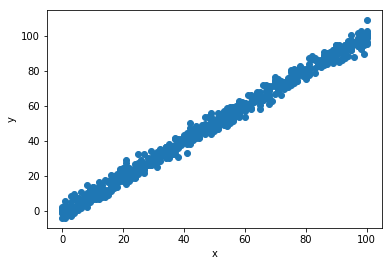

In [56]:
#plot it 
plt.scatter(dfKaggleLinRegTrain.x,dfKaggleLinRegTrain.y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [73]:
#Linear Regression fit
from sklearn.linear_model import LinearRegression
traindata = np.asanyarray(dfKaggleLinRegTrain.x)
traindata = traindata.reshape(-1,1)
trainlabel = np.asanyarray(dfKaggleLinRegTrain.y) #tounderstand: why this didnt work: kept giving value error: 
# ValueError: Input contains NaN, infinity or a value too large for dtype('float64')
trainlabel = trainlabel.reshape(-1,1)
# traindata = dfKaggleLinRegTrain.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
# trainlabel = dfKaggleLinRegTrain.iloc[:, 1].values.reshape(-1, 1)  

LinRegModel = LinearRegression().fit(traindata,trainlabel)
# LinearRegression().fit(np.asanyarray(dfKaggleLinRegTrain.x),np.asanyarray(dfKaggleLinRegTrain.y));

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

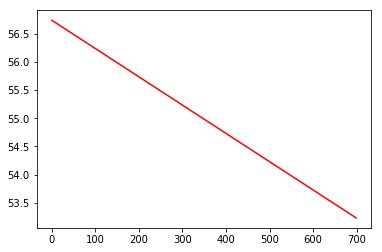

In [70]:
#Test
dfKaggleLinRegTest = pd.read_csv("/home/nirzareevadgama/Data/MLDatasets/1_LinearRegression_Kaggle/test.csv")
testdata = dfKaggleLinRegTest.iloc[:,0].values.reshape(-1,1)
testlabel = dfKaggleLinRegTest.iloc[:,1].values.reshape(-1,1)
testpredicted = LinRegModel.predict(testdata)

#plot

plt.plot(traindata,LinRegModel.coef_[0][0]*traindata + LinRegModel.intercept_[0],'-r')

In [ ]:
#get accuracy
print("MAE on test data is %.2f " % np.mean(np.absolute(testpredicted - testlabel)))

from sklearn.metrics import r2_score
print("R2 score of the model is %.2f" % r2_score(testpredicted,testlabel))
